In [1]:
from matplotlib.animation import FuncAnimation
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#Needing to comment all of the below

In [3]:
# Setup folder for data

# Get current working directory
cwd = os.getcwd()

# Set data folder location
data_loc = os.path.join(cwd, "Attractor_Renders")

# Search for data folder
if "Attractor_Renders" not in os.listdir(cwd):

    # Create data folder if not found
    os.makedirs(data_loc)

KeyboardInterrupt: 

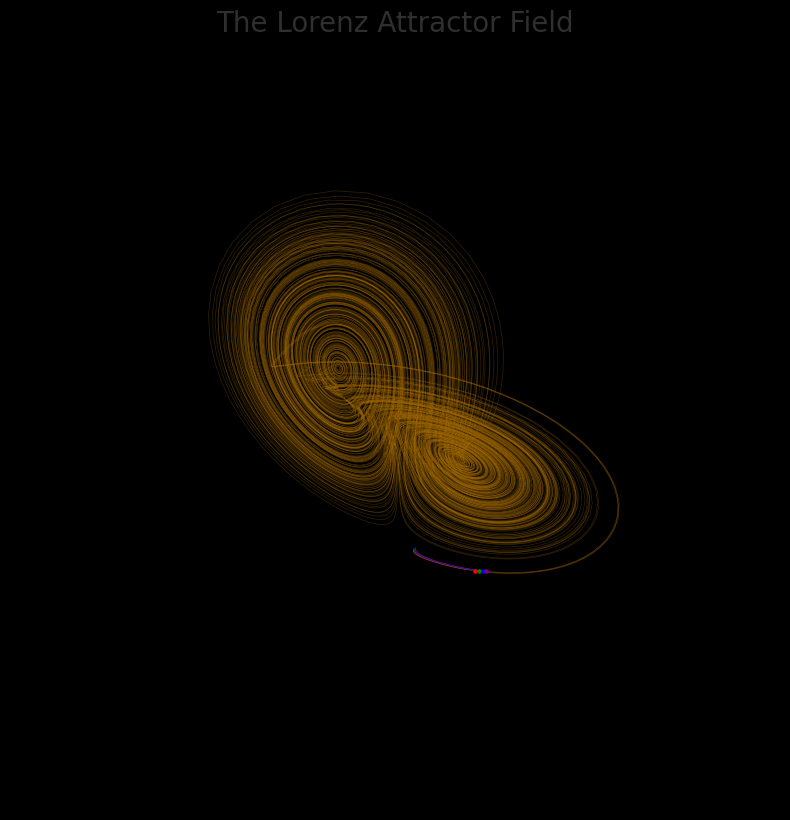

In [4]:
dt = 0.01
num_steps = 10000

def lorenz(xyz, *, s=10, r=28, b=2.667):

    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z

    return np.array([x_dot, y_dot, z_dot])

def create_points_lorenz(num_steps, step_size, starting_values):
    points = np.empty((num_steps + 1, 3))
    points[0] = starting_values
    for i in range(num_steps):
        points[i + 1] = points[i] + lorenz(points[i]) * step_size
    
    return points

a1 = create_points_lorenz(num_steps, dt, (0.1, 2., 1.5,))
a2 = create_points_lorenz(num_steps, dt, (0.11, 2.1, 1.6))
a3 = create_points_lorenz(num_steps, dt, (0.12, 2.2, 1.7))
a4 = create_points_lorenz(num_steps, dt, (0.13, 2.3, 1.8))

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = plt.axes(projection="3d")
ax.grid(False)
plt.axis("off")

def init_func():
    ax.clear()
    plt.axis("off")
    ax.grid(False)

def update_plot(t):
    ax.clear()
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    plt.axis("off")
    if t < 100:
        ax.set_title(f"The Lorenz Attractor Field", alpha=(t/100), fontsize=20)
    else:
        ax.set_title(f"The Lorenz Attractor Field", alpha=1, fontsize=20)
    ax.scatter(*a1[t].T, marker="o", color="red", s=5)
    ax.scatter(*a2[t].T, marker="o", color="green", s=5)
    ax.scatter(*a3[t].T, marker="o", color="blue", s=5)
    ax.scatter(*a4[t].T, marker="o", color="purple", s=5)
    ax.plot3D(*a1.T, color="orange", lw=0.5, alpha=0.2)
    ax.plot3D(*a2.T, color="orange", lw=0.5, alpha=0.2)
    ax.plot3D(*a3.T, color="orange", lw=0.5, alpha=0.2)
    ax.plot3D(*a4.T, color="orange", lw=0.5, alpha=0.2)
    if t > 100:
        ax.plot3D(*a1[t-100:t].T, color="red", lw=0.5, alpha=1)
        ax.plot3D(*a2[t-100:t].T, color="green", lw=0.5, alpha=1)
        ax.plot3D(*a3[t-100:t].T, color="blue", lw=0.5, alpha=1)
        ax.plot3D(*a4[t-100:t].T, color="purple", lw=0.5, alpha=1)
    else: 
        ax.plot3D(*a1[:t].T, color="red", lw=0.5, alpha=1)
        ax.plot3D(*a2[:t].T, color="green", lw=0.5, alpha=1)
        ax.plot3D(*a3[:t].T, color="blue", lw=0.5, alpha=1)
        ax.plot3D(*a4[:t].T, color="purple", lw=0.5, alpha=1)
    ax.view_init(30, t/1000 * 180)

anim = FuncAnimation(fig, update_plot, frames=np.arange(0, 10000, 1), init_func=init_func, interval=1)

anim.save("Data/Lorenz.mp4", dpi=150, fps=30, writer="ffmpeg")

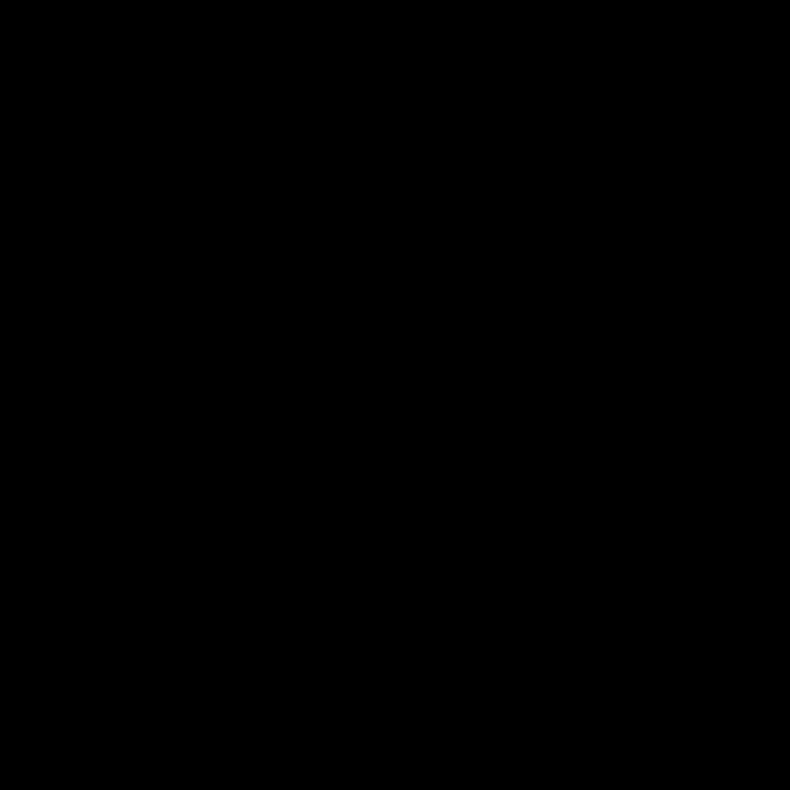

In [ ]:
def newton_leipnik(xyz, *, a=0.4, b=0.175):

    x, y, z = xyz
    x_dot = -a*x + y + 10*y*z
    y_dot = -x - .4*y + 5*x*z
    z_dot = b*z - 5*x*y

    return np.array([x_dot, y_dot, z_dot])

def create_points_newton(num_steps, step_size, starting_values):
    points = np.empty((num_steps + 1, 3))
    points[0] = starting_values
    for i in range(num_steps):
        points[i + 1] = points[i] + newton_leipnik(points[i]) * step_size
    
    return points

a1 = create_points_newton(num_steps, dt, (0.349, 0, 0.16))
a2 = create_points_newton(num_steps, dt, (0.348, 0, 0.17))
a3 = create_points_newton(num_steps, dt, (0.347, 0, 0.18))
a4 = create_points_newton(num_steps, dt, (0.346, 0, 0.19))

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = plt.axes(projection="3d")
ax.grid(False)
plt.axis("off")

def init_func():
    ax.clear()
    plt.axis("off")
    ax.grid(False)

def update_plot(t):
    ax.clear()
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    plt.axis("off")
    if t < 100:
        ax.set_title(f"The Newton-Leipnik Attractor Field", alpha=(t/100), fontsize=20)
    else:
        ax.set_title(f"The Newton-Leipnik Attractor Field", alpha=1, fontsize=20)
    ax.scatter(*a1[t].T, marker="o", color="red", s=5)
    ax.scatter(*a2[t].T, marker="o", color="green", s=5)
    ax.scatter(*a3[t].T, marker="o", color="blue", s=5)
    ax.scatter(*a4[t].T, marker="o", color="purple", s=5)
    ax.plot3D(*a1.T, color="orange", lw=0.5, alpha=0.2)
    ax.plot3D(*a2.T, color="orange", lw=0.5, alpha=0.2)
    ax.plot3D(*a3.T, color="orange", lw=0.5, alpha=0.2)
    ax.plot3D(*a4.T, color="orange", lw=0.5, alpha=0.2)
    if t > 100:
        ax.plot3D(*a1[t-100:t].T, color="red", lw=0.5, alpha=1)
        ax.plot3D(*a2[t-100:t].T, color="green", lw=0.5, alpha=1)
        ax.plot3D(*a3[t-100:t].T, color="blue", lw=0.5, alpha=1)
        ax.plot3D(*a4[t-100:t].T, color="purple", lw=0.5, alpha=1)
    else: 
        ax.plot3D(*a1[:t].T, color="red", lw=0.5, alpha=1)
        ax.plot3D(*a2[:t].T, color="green", lw=0.5, alpha=1)
        ax.plot3D(*a3[:t].T, color="blue", lw=0.5, alpha=1)
        ax.plot3D(*a4[:t].T, color="purple", lw=0.5, alpha=1)
    ax.view_init(30, t/1000 * 180)


anim = FuncAnimation(fig, update_plot, frames=np.arange(0, 10000, 1), init_func=init_func, interval=1)

anim.save("Data/NewtonLeipnik.mp4", dpi=150, fps=30, writer="ffmpeg")

In [ ]:
def sprott(xyz, *, a=2.07, b=1.79):

    x, y, z = xyz
    x_dot = y + a*x*y + x*z
    y_dot = 1 - b*x**2 + y*z
    z_dot = x - x**2 - y**2

    return np.array([x_dot, y_dot, z_dot])

def create_points_sprott(num_steps, step_size, starting_values):
    points = np.empty((num_steps + 1, 3))
    points[0] = starting_values
    for i in range(num_steps):
        points[i + 1] = points[i] + sprott(points[i]) * step_size
    
    return points

a1 = create_points_sprott(num_steps, dt, (0.63, 0.47, -0.54))
a2 = create_points_sprott(num_steps, dt, (0.64, 0.48, -0.55))
a3 = create_points_sprott(num_steps, dt, (0.65, 0.49, -0.56))
a4 = create_points_sprott(num_steps, dt, (0.66, 0.50, -0.57))

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = plt.axes(projection="3d")
ax.grid(False)
plt.axis("off")

def init_func():
    ax.clear()
    plt.axis("off")
    ax.grid(False)

def update_plot(t):
    ax.clear()
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    plt.axis("off")
    if t < 100:
        ax.set_title(f"Sprott Attractor Field", alpha=(t/100), fontsize=20)
    else:
        ax.set_title(f"Sprott Attractor Field", alpha=1, fontsize=20)
    ax.scatter(*a1[t].T, marker="o", color="red", s=5)
    ax.scatter(*a2[t].T, marker="o", color="green", s=5)
    ax.scatter(*a3[t].T, marker="o", color="blue", s=5)
    ax.scatter(*a4[t].T, marker="o", color="purple", s=5)
    ax.plot3D(*a1.T, color="orange", lw=0.5, alpha=0.2)
    ax.plot3D(*a2.T, color="orange", lw=0.5, alpha=0.2)
    ax.plot3D(*a3.T, color="orange", lw=0.5, alpha=0.2)
    ax.plot3D(*a4.T, color="orange", lw=0.5, alpha=0.2)
    if t > 100:
        ax.plot3D(*a1[t-100:t].T, color="red", lw=0.5, alpha=1)
        ax.plot3D(*a2[t-100:t].T, color="green", lw=0.5, alpha=1)
        ax.plot3D(*a3[t-100:t].T, color="blue", lw=0.5, alpha=1)
        ax.plot3D(*a4[t-100:t].T, color="purple", lw=0.5, alpha=1)
    else: 
        ax.plot3D(*a1[:t].T, color="red", lw=0.5, alpha=1)
        ax.plot3D(*a2[:t].T, color="green", lw=0.5, alpha=1)
        ax.plot3D(*a3[:t].T, color="blue", lw=0.5, alpha=1)
        ax.plot3D(*a4[:t].T, color="purple", lw=0.5, alpha=1)
    ax.view_init(30, t/1000 * 180)

anim = FuncAnimation(fig, update_plot, frames=np.arange(0, 10000, 1), init_func=init_func, interval=1)

anim.save("Data/Sprott.mp4", dpi=150, fps=30, writer="ffmpeg")

KeyboardInterrupt: 

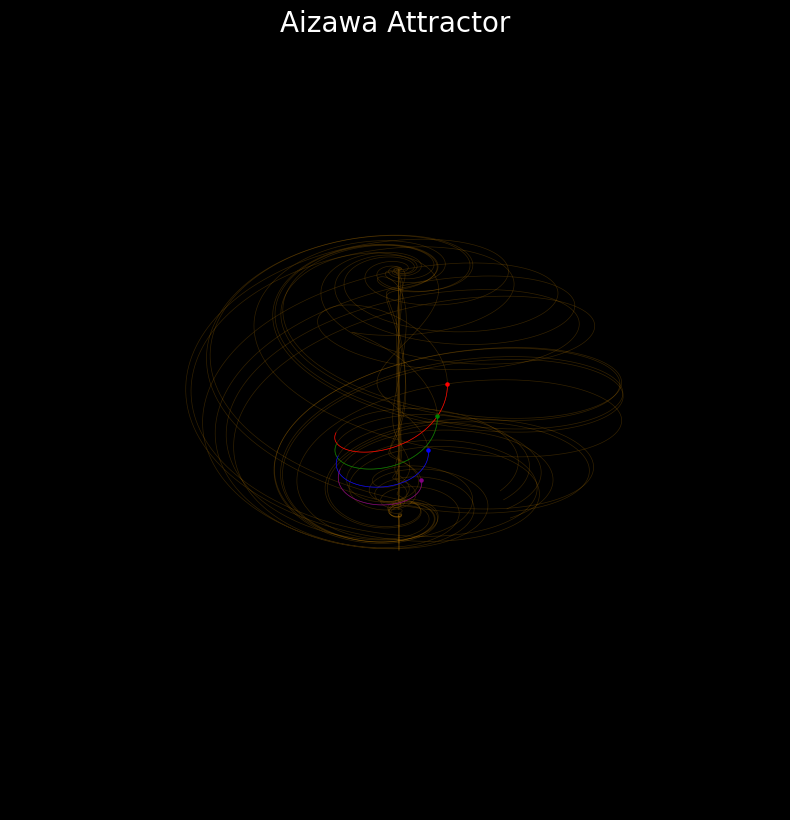

In [ ]:
def aizawa(xyz, *, a=0.95, b=0.7, c=0.6, d=3.5, e=0.25, f=0.1):

    x, y, z = xyz
    x_dot = (z-b)*x - d*y
    y_dot = d*x + (z-b)*y
    z_dot = c + a*z - 0.3*z**3 - (x**2 + y**2)*(1 + e*z) + f*z*x**3

    return np.array([x_dot, y_dot, z_dot])

def create_points_aizawa(num_steps, step_size, starting_values):
    points = np.empty((num_steps + 1, 3))
    points[0] = starting_values
    for i in range(num_steps):
        points[i + 1] = points[i] + aizawa(points[i]) * step_size
    
    return points

a1 = create_points_aizawa(num_steps, dt, (0.1, 1, 0.01))
a2 = create_points_aizawa(num_steps, dt, (0.2, 1.1, 0.02))
a3 = create_points_aizawa(num_steps, dt, (0.3, 1.2, 0.03))
a4 = create_points_aizawa(num_steps, dt, (0.4, 1.3, 0.04))

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = plt.axes(projection="3d")
ax.grid(False)
plt.axis("off")

def init_func():
    ax.clear()
    plt.axis("off")
    ax.grid(False)

def update_plot(t):
    ax.clear()
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    plt.axis("off")
    if t < 100:
        ax.set_title(f"Aizawa Attractor", alpha=(t/100), fontsize=20)
    else:
        ax.set_title(f"Aizawa Attractor", alpha=1, fontsize=20)
    ax.scatter(*a1[t].T, marker="o", color="red", s=5)
    ax.scatter(*a2[t].T, marker="o", color="green", s=5)
    ax.scatter(*a3[t].T, marker="o", color="blue", s=5)
    ax.scatter(*a4[t].T, marker="o", color="purple", s=5)
    ax.plot3D(*a1.T, color="orange", lw=0.5, alpha=0.2)
    ax.plot3D(*a2.T, color="orange", lw=0.5, alpha=0.2)
    ax.plot3D(*a3.T, color="orange", lw=0.5, alpha=0.2)
    ax.plot3D(*a4.T, color="orange", lw=0.5, alpha=0.2)
    if t > 100:
        ax.plot3D(*a1[t-100:t].T, color="red", lw=0.5, alpha=1)
        ax.plot3D(*a2[t-100:t].T, color="green", lw=0.5, alpha=1)
        ax.plot3D(*a3[t-100:t].T, color="blue", lw=0.5, alpha=1)
        ax.plot3D(*a4[t-100:t].T, color="purple", lw=0.5, alpha=1)
    else: 
        ax.plot3D(*a1[:t].T, color="red", lw=0.5, alpha=1)
        ax.plot3D(*a2[:t].T, color="green", lw=0.5, alpha=1)
        ax.plot3D(*a3[:t].T, color="blue", lw=0.5, alpha=1)
        ax.plot3D(*a4[:t].T, color="purple", lw=0.5, alpha=1)
    ax.view_init(30, t/1000 * 180)

anim = FuncAnimation(fig, update_plot, frames=np.arange(0, 10000, 1), init_func=init_func, interval=1)

anim.save("Data/Aizawa.mp4", dpi=150, fps=30, writer="ffmpeg")

In [ ]:
def halvorsen(xyz, *, a=1.89):
    
    x, y, z = xyz
    x_dot = -a*x - 4*y - 4*z -y**2
    y_dot = -a*y - 4*z - 4*x -z**2
    z_dot = -a*z - 4*x - 4*y -x**2
    
    return np.array([x_dot, y_dot, z_dot])

def create_points_halvorsen(num_steps, step_size, starting_values):
    points = np.empty((num_steps + 1, 3))
    points[0] = starting_values
    for i in range(num_steps):
        points[i + 1] = points[i] + halvorsen(points[i]) * step_size
    
    return points

a1 = create_points_halvorsen(num_steps, dt, (-1.48, -1.51, 2.04))
a2 = create_points_halvorsen(num_steps, dt, (-1.50, -1.51, 2.04))
a3 = create_points_halvorsen(num_steps, dt, (-1.52, -1.51, 2.04))
a4 = create_points_halvorsen(num_steps, dt, (-1.54, -1.51, 2.04))

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = plt.axes(projection="3d")
ax.grid(False)
plt.axis("off")

def init_func():
    ax.clear()
    plt.axis("off")
    ax.grid(False)

def update_plot(t):
    ax.clear()
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    plt.axis("off")
    if t < 100:
        ax.set_title(f"Halvorsen Attractor", alpha=(t/100), fontsize=20)
    else:
        ax.set_title(f"Halvorsen Attractor", alpha=1, fontsize=20)
    ax.scatter(*a1[t].T, marker="o", color="red", s=5)
    ax.scatter(*a2[t].T, marker="o", color="green", s=5)
    ax.scatter(*a3[t].T, marker="o", color="blue", s=5)
    ax.scatter(*a4[t].T, marker="o", color="purple", s=5)
    ax.plot3D(*a1.T, color="orange", lw=0.5, alpha=0.2)
    ax.plot3D(*a2.T, color="orange", lw=0.5, alpha=0.2)
    ax.plot3D(*a3.T, color="orange", lw=0.5, alpha=0.2)
    ax.plot3D(*a4.T, color="orange", lw=0.5, alpha=0.2)
    if t > 100:
        ax.plot3D(*a1[t-100:t].T, color="red", lw=0.5, alpha=1)
        ax.plot3D(*a2[t-100:t].T, color="green", lw=0.5, alpha=1)
        ax.plot3D(*a3[t-100:t].T, color="blue", lw=0.5, alpha=1)
        ax.plot3D(*a4[t-100:t].T, color="purple", lw=0.5, alpha=1)
    else: 
        ax.plot3D(*a1[:t].T, color="red", lw=0.5, alpha=1)
        ax.plot3D(*a2[:t].T, color="green", lw=0.5, alpha=1)
        ax.plot3D(*a3[:t].T, color="blue", lw=0.5, alpha=1)
        ax.plot3D(*a4[:t].T, color="purple", lw=0.5, alpha=1)
    ax.view_init(30, t/1000 * 180)

anim = FuncAnimation(fig, update_plot, frames=np.arange(0, 10000, 1), init_func=init_func, interval=1)

anim.save("Data/Halvorsen.mp4", dpi=150, fps=30, writer="ffmpeg")

KeyboardInterrupt: 

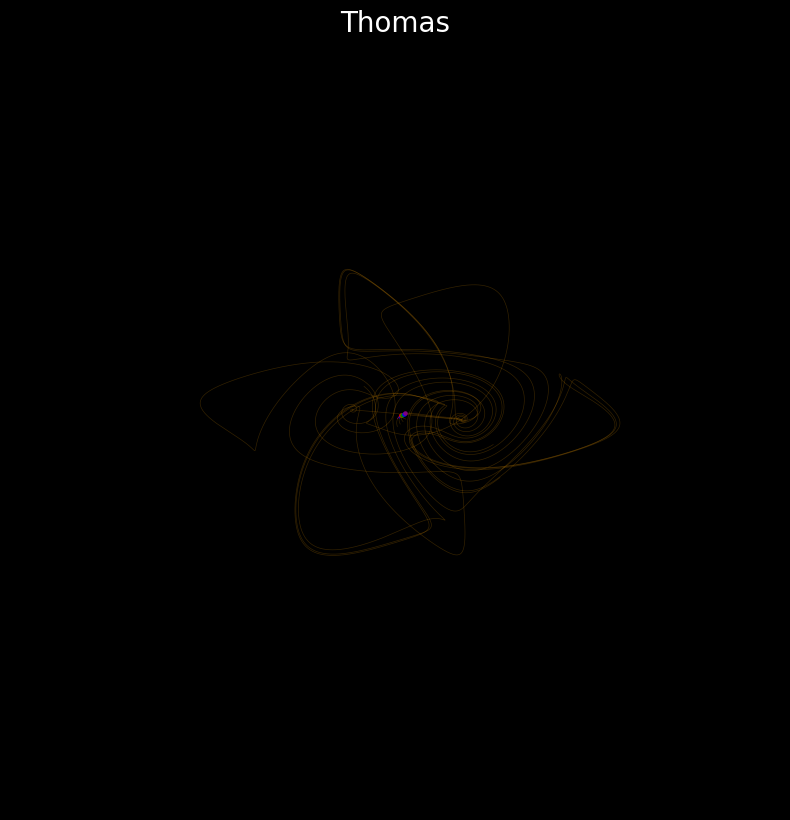

In [ ]:
dt = 0.01
num_steps = 10000

def thomas(xyz, *, a=0.21):
   
    x, y, z = xyz
    x_dot = np.sin(y) - a*x
    y_dot = np.sin(z) - a*y
    z_dot = np.sin(x) - a*z
    
    return np.array([x_dot, y_dot, z_dot])

def create_points_thomas(num_steps, step_size, starting_values):
    points = np.empty((num_steps + 1, 3))
    points[0] = starting_values
    for i in range(num_steps):
        points[i + 1] = points[i] + thomas(points[i]) * step_size
    
    return points

a1 = create_points_thomas(num_steps, dt, (0, 0.03, -0.11))
a2 = create_points_thomas(num_steps, dt, (0.1, 0.03, -0.11))
a3 = create_points_thomas(num_steps, dt, (0.2, 0.03, -0.11))
a4 = create_points_thomas(num_steps, dt, (0.3, 0.03, -0.11))

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = plt.axes(projection="3d")
ax.grid(False)
plt.axis("off")

def init_func():
    ax.clear()
    plt.axis("off")
    ax.grid(False)

def update_plot(t, name):
    ax.clear()
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    plt.axis("off")
    if t < 100:
        ax.set_title(f"{name}", alpha=(t/100), fontsize=20)
    else:
        ax.set_title(f"{name}", alpha=1, fontsize=20)
    ax.scatter(*a1[t].T, marker="o", color="red", s=5)
    ax.scatter(*a2[t].T, marker="o", color="green", s=5)
    ax.scatter(*a3[t].T, marker="o", color="blue", s=5)
    ax.scatter(*a4[t].T, marker="o", color="purple", s=5)
    ax.plot3D(*a1.T, color="orange", lw=0.5, alpha=0.2)
    ax.plot3D(*a2.T, color="orange", lw=0.5, alpha=0.2)
    ax.plot3D(*a3.T, color="orange", lw=0.5, alpha=0.2)
    ax.plot3D(*a4.T, color="orange", lw=0.5, alpha=0.2)
    if t > 100:
        ax.plot3D(*a1[t-100:t].T, color="red", lw=0.5, alpha=1)
        ax.plot3D(*a2[t-100:t].T, color="green", lw=0.5, alpha=1)
        ax.plot3D(*a3[t-100:t].T, color="blue", lw=0.5, alpha=1)
        ax.plot3D(*a4[t-100:t].T, color="purple", lw=0.5, alpha=1)
    else: 
        ax.plot3D(*a1[:t].T, color="red", lw=0.5, alpha=1)
        ax.plot3D(*a2[:t].T, color="green", lw=0.5, alpha=1)
        ax.plot3D(*a3[:t].T, color="blue", lw=0.5, alpha=1)
        ax.plot3D(*a4[:t].T, color="purple", lw=0.5, alpha=1)
    ax.view_init(30, t/1000 * 180)

anim = FuncAnimation(fig, update_plot, frames=np.arange(0, 10000, 1), init_func=init_func, fargs=("Thomas",), interval=1)

anim.save("Data/Thomas.mp4", dpi=150, fps=30, writer="ffmpeg")

Iteration No: 9999 out of 10000


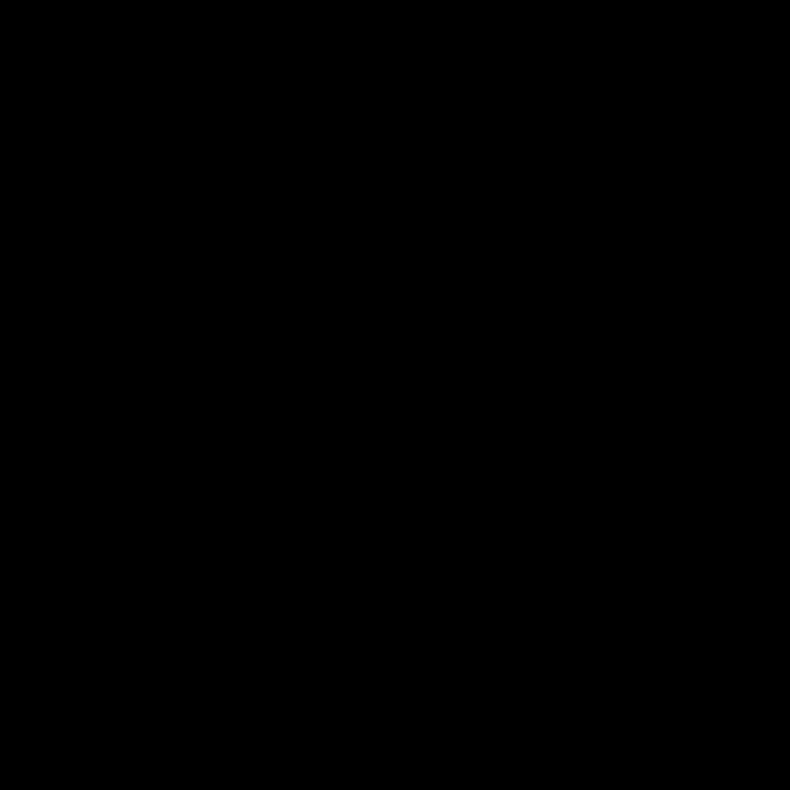

In [1]:
from attractors import Attractor

attractor = Attractor(0.01, 10000)

lorenz_starting = [(0.1 + 0.1*(x+1), 2., 1.5,) for x in range(10)]
newton_starting = [(0.349 - 0.001*(x+1), 0, 0.16 + 0.01*(x+1)) for x in range(10)]

lorenz_system = [attractor.create_points(start, attractor.lorenz_setup) for start in lorenz_starting]
newton_system = [attractor.create_points(start, attractor.newton_leipnik) for start in newton_starting]

attractor.draw_figure("Newton-Leipnik", newton_system)
